# Sistemas compatibles determinados con Python

Dado un sistema de ecuaciones lineales

numpy.linanlg.solve(A,b)

siempre que se trate de un sistema compatible determinado

In [2]:
import numpy as np

A = np.array([[1,1,2],[2,4,-3],[3,6,-5]])
b = np.array([9,1,0])

AB = np.array([[1,1,2,9],[2,4,-3,1],[0,3,6,-5]])

## Checar Rango

In [3]:
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

np.True_

## Checar si el numero de incognitas es igual al rango

In [4]:
np.linalg.matrix_rank(A) == 3

np.True_

## Por lo que se puede resolver

In [5]:
x = np.linalg.solve(A,b)
x

array([1., 2., 3.])

Esta es la solucion: x1 = 1, x2 = 2 y x3 = 3


## Comprobacion por multiplicacion

In [6]:
A.dot(x)

array([9., 1., 0.])

# Sympy - Otra libreria que se puede usar 

In [7]:
from sympy import *
from sympy.solvers.solveset import linsolve

# Declaracion de simbolos
x,y,z = symbols('x,y,z')
x1,x2,x3 = symbols('x1,x2,x3')


## Resolviendo lista de ecuaciones

Para resolver la lista de ecuaciones se deben de igualar a 0

> Original

$2x_{1} + 2x_{2} = 1$

$-x_{1} + x_{2} = 2$

> Igualado a 0

$2x_{1} + 2x_{2} - 1 = 0$

$-x_{1} + x_{2} - 2 = 0$

In [8]:
linsolve([2*x1 + 2*x2 - 1, -x1 + x2 - 2], (x1,x2))

{(-3/4, 5/4)}

## Resolviendo con la matriz ampliada

In [9]:
linsolve(Matrix(([2,2,1],[-1,1,2])),(x1,x2))

{(-3/4, 5/4)}

## Resolviendo introduciendo el sistema

In [14]:
AB = Matrix(((2,2,1),(-1,1,2))) # Matriz ampliada
A = AB[:,:-1]
b = AB[:,-1]
b
system = A,b
linsolve(system, x1, x2)

{(-3/4, 5/4)}

# Representacion de sistemas con Python

In [15]:
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


## Teniendo el sistema de ecuaciones

$2x_{1} + 2x_{2} = 1$

$-x_{1} + 4x_{2} = 2$


Reescribiendo

$x_{2} = 1/2 - x_{1}$

$x_{2} = (2+x{1})/4$

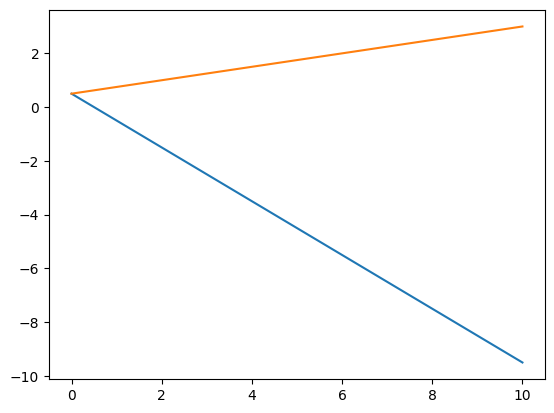

In [18]:
x1 = np.linspace(0,10,100)
plt.plot(x1,1/2-x1,x1,(2+x1)/4)

## Otro Ejemplo

$4x + 2y = 3$

$x - 2y = 2$

$3x + 4y = 1$

Lo reescribimos

$y = 3/2 - 2x$

$y = x/2 - 1$

$y = (1-3x)/4$

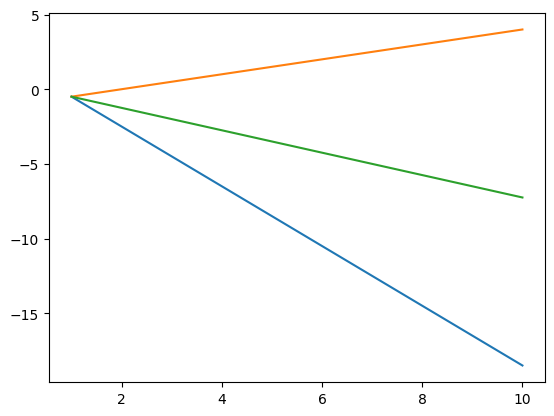

In [24]:
x1 = np.linspace(1,10,100)
plt.plot(x1, 3/2 - 2*x1, x1, (x1/2 - 1), x1, (1-3*x1)/4)

## Sistema de 3 ecuaciones con 3 incognitas

No es intereactivo como en R

In [26]:
from mpl_toolkits.mplot3d import Axes3D

point1 = np.array([0,0,9/2])
n1 = np.array([1,1,2])

point2 = np.array([0,0,-1/3])
n2 = np.array([2,4,-3])

point3 = np.array([0,0,0])
n3 = np.array([3,6,-5])

 

Las n de arriba son de la matriz original,

x + y + 2z = 9

2x + 4y - 3z = 1

3x + 6y - 5z = 0

los point, son puntos que se cumple para cada una de las ecuaciones anteriores, estos numeros son arbitrarios, asi que se pueden usar cualquieras.




In [29]:
X,Y = np.meshgrid(range(30), range(30))
D1 = -9
D2 = -1
D3 = 0


Ahora hay que definir Z en funcion de X y Y


$z = (9-x-y)/2$

$z = (2x+4y-1)/3$

$z = (3x+6y)/5$



Notar que Z es 

$(-Ax - By - D)/C$

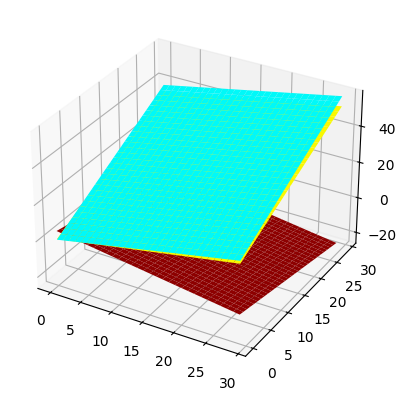

In [34]:
z1 = (-n1[0]*X - n1[1]*Y - D1)* 1./n1[2]
z2 = (-n2[0]*X - n2[1]*Y - D2)*1./n2[2]
z3 = (-n3[0]*X - n3[1]*Y - D3)*1./n3[2]

plot3d =  plt.figure().add_subplot(projection = '3d')

plot3d.plot_surface(X,Y,z1, color='red')
plot3d.plot_surface(X,Y,z2, color='cyan')
plot3d.plot_surface(X,Y,z3, color='yellow')
plt.show()

# Sistemas compatibles indeterminados

In [35]:
A = np.array([[1,1,-1],[1,-1,1],[3,1,-1]])
B = np.array([2,1,5])
AB = np.array([[1,1,-1,2],[1,-1,1,1],[3,1,-1,5]])

Checando los rangos

In [38]:
np.linalg.matrix_rank(A)

np.int64(2)

In [39]:
np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

np.True_

Son iguales a 2, pero hay 3 incognitas, por lo que es indeterminado

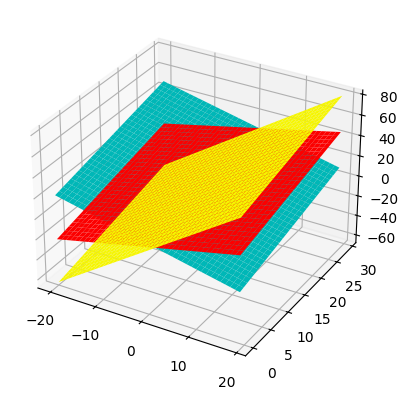

In [42]:
point1 = np.array([0,0,-2])
n1 = np.array([1,1,-1])

point2 = np.array([0,0,1])
n2 = np.array([1,-1,1])

point3 = np.array([0,0,-5])
n3 = np.array([3,1,-1])

D1 =-2
D2 = -1
D3 = -5

X,Y = np.meshgrid(range(-20,20), range(30))

z1 = (-n1[0]*X - n1[1]*Y - D1)* 1./n1[2]
z2 = (-n2[0]*X - n2[1]*Y - D2)*1./n2[2]
z3 = (-n3[0]*X - n3[1]*Y - D3)*1./n3[2]

plot3d =  plt.figure().add_subplot(projection = '3d')

plot3d.plot_surface(X,Y,z1, color='red')
plot3d.plot_surface(X,Y,z2, color='cyan')
plot3d.plot_surface(X,Y,z3, color='yellow')
plt.show()

## Resolviendo sistems compatibles indeterminados

Usando el mismo ejemplo 


$x + y - z = 2$

$x - y + z = 1$

$3x + y - z = 5$

In [44]:
linsolve([x+y-z-2,x-y+z-1,3*x+ y -z - 5], (x,y,z))

{(3/2, z + 1/2, z)}

In [48]:
linsolve(Matrix(([1,1,-1,2],[1,-1,1,1],[3,1,-1,5])),(x,y,z))

{(3/2, z + 1/2, z)}

In [49]:
AB = Matrix(((1,1,-1,2),(1,-1,1,1),(3,1,-1,5)))
A = AB[:,:-1]
B = AB[:,-1]
system = A,B
linsolve(system,x,y,z)

{(3/2, z + 1/2, z)}

## Sistemas incompatibles con Python

$x + y = 2$

$x - y = 1$

$2x + y = 3$

In [50]:
A = np.matrix(([1,1],[1,-1],[2,1]))
B = np.matrix([2,1,3])
AB = np.matrix(([1,1,2],[1,-1,1],[2,1,3]))

np.linalg.matrix_rank(A) == np.linalg.matrix_rank(AB)

np.False_

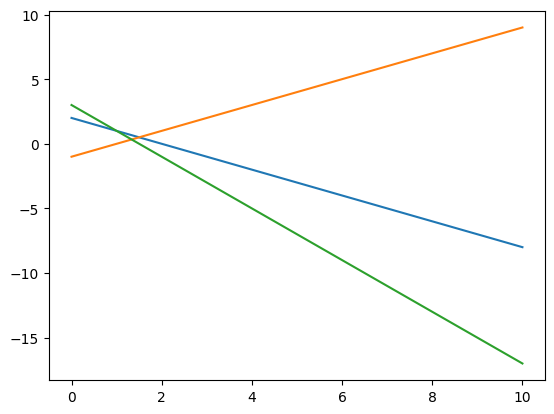

In [51]:
x = np.linspace(0,10,100)
plt.plot(x,2-x, x,-1 + x,x,3-2*x)

In [52]:
linsolve(Matrix(([1,1,2],[1,-1,1],[2,1,3])),(x,y))


SympifyError: SympifyError: array([0, 0.101010101010101, 0.202020202020202, 0.303030303030303,
       0.404040404040404, 0.505050505050505, 0.606060606060606,
       0.707070707070707, 0.808080808080808, 0.909090909090909,
       1.01010101010101, 1.11111111111111, 1.21212121212121,
       1.31313131313131, 1.41414141414141, 1.51515151515152,
       1.61616161616162, 1.71717171717172, 1.81818181818182,
       1.91919191919192, 2.02020202020202, 2.12121212121212,
       2.22222222222222, 2.32323232323232, 2.42424242424242,
       2.52525252525253, 2.62626262626263, 2.72727272727273,
       2.82828282828283, 2.92929292929293, 3.03030303030303,
       3.13131313131313, 3.23232323232323, 3.33333333333333,
       3.43434343434343, 3.53535353535354, 3.63636363636364,
       3.73737373737374, 3.83838383838384, 3.93939393939394,
       4.04040404040404, 4.14141414141414, 4.24242424242424,
       4.34343434343434, 4.44444444444444, 4.54545454545454,
       4.64646464646465, 4.74747474747475, 4.84848484848485,
       4.94949494949495, 5.05050505050505, 5.15151515151515,
       5.25252525252525, 5.35353535353535, 5.45454545454545,
       5.55555555555556, 5.65656565656566, 5.75757575757576,
       5.85858585858586, 5.95959595959596, 6.06060606060606,
       6.16161616161616, 6.26262626262626, 6.36363636363636,
       6.46464646464646, 6.56565656565657, 6.66666666666667,
       6.76767676767677, 6.86868686868687, 6.96969696969697,
       7.07070707070707, 7.17171717171717, 7.27272727272727,
       7.37373737373737, 7.47474747474747, 7.57575757575758,
       7.67676767676768, 7.77777777777778, 7.87878787878788,
       7.97979797979798, 8.08080808080808, 8.18181818181818,
       8.28282828282828, 8.38383838383838, 8.48484848484848,
       8.58585858585859, 8.68686868686869, 8.78787878787879,
       8.88888888888889, 8.98989898989899, 9.09090909090909,
       9.19191919191919, 9.29292929292929, 9.39393939393939,
       9.49494949494949, 9.59595959595960, 9.69696969696970,
       9.79797979797980, 9.89898989898990, 10.0000000000000], dtype=object)